In [44]:
import numpy as np
import pandas as pd

pd.set_option('max_columns', None)

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings(action='ignore')

In [45]:
data = pd.read_csv('fh.csv')

### Справка о данных:

Классифицируйте состояние здоровья плода с целью предотвращения детской и материнской смертности.


Сокращение детской смертности является ключевым показателем прогресса человечества.

ООН ожидает, что к 2030 году страны остановят предотвратимую смертность новорожденных и детей в возрасте до 5 лет.

Также существует проблема материнской смертности, на долю которой приходится 295 000 смертей в процессе, при родах и после беременности (по данным на 2017 год). Подавляющее большинство этих смертей (94%) произошло в условиях нехватки ресурсов, и большинство из них можно было бы предотвратить.

В свете того, что было упомянуто выше, КТГ являются простым и доступным по стоимости вариантом оценки здоровья плода, позволяющим медицинским работникам принимать меры для предотвращения детской и материнской смертности. Само оборудование работает, посылая ультразвуковые импульсы и считывая их реакцию, тем самым предоставляя информацию о частоте сердечных сокращений плода (ЧСС), движении плода и многое другое.

Этот набор данных содержит 2126 записей, полученных с помощью КТГ, которые затем были классифицированы на 3 типа:

1) Normal

2) Suspect

3) Pathological

In [46]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Видно, что в данных нет пропусков

### Исследуем данные

In [48]:
dat_c = data.copy()

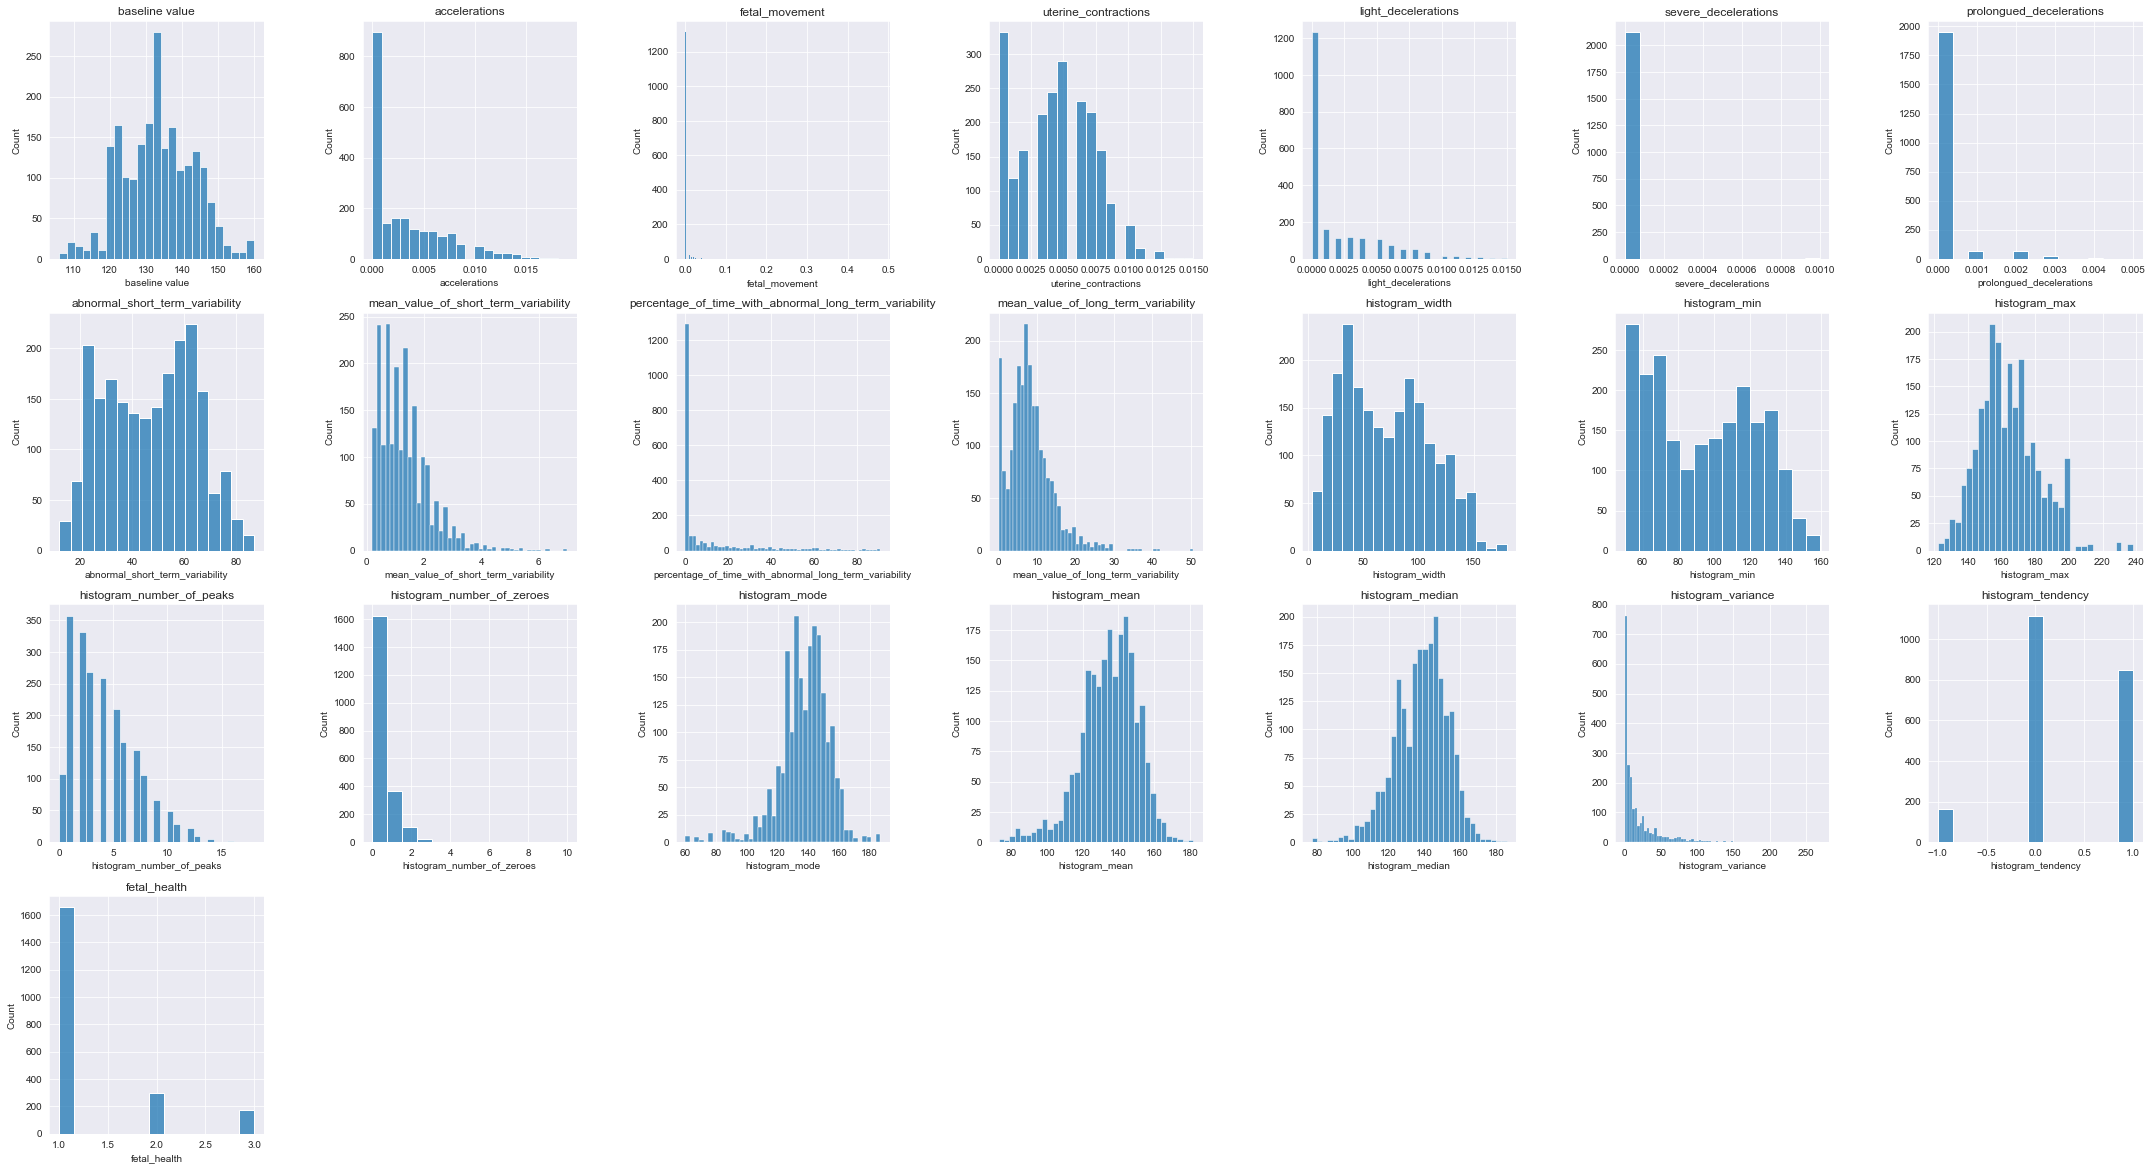

In [49]:
plt.figure(figsize=(30, 20))

for i, column in enumerate(dat_c.columns):
    plt.subplot(5, 7, i + 1)
    
    sns.histplot(data = dat_c[column])
    plt.title(column)

    
plt.tight_layout()
plt.show()

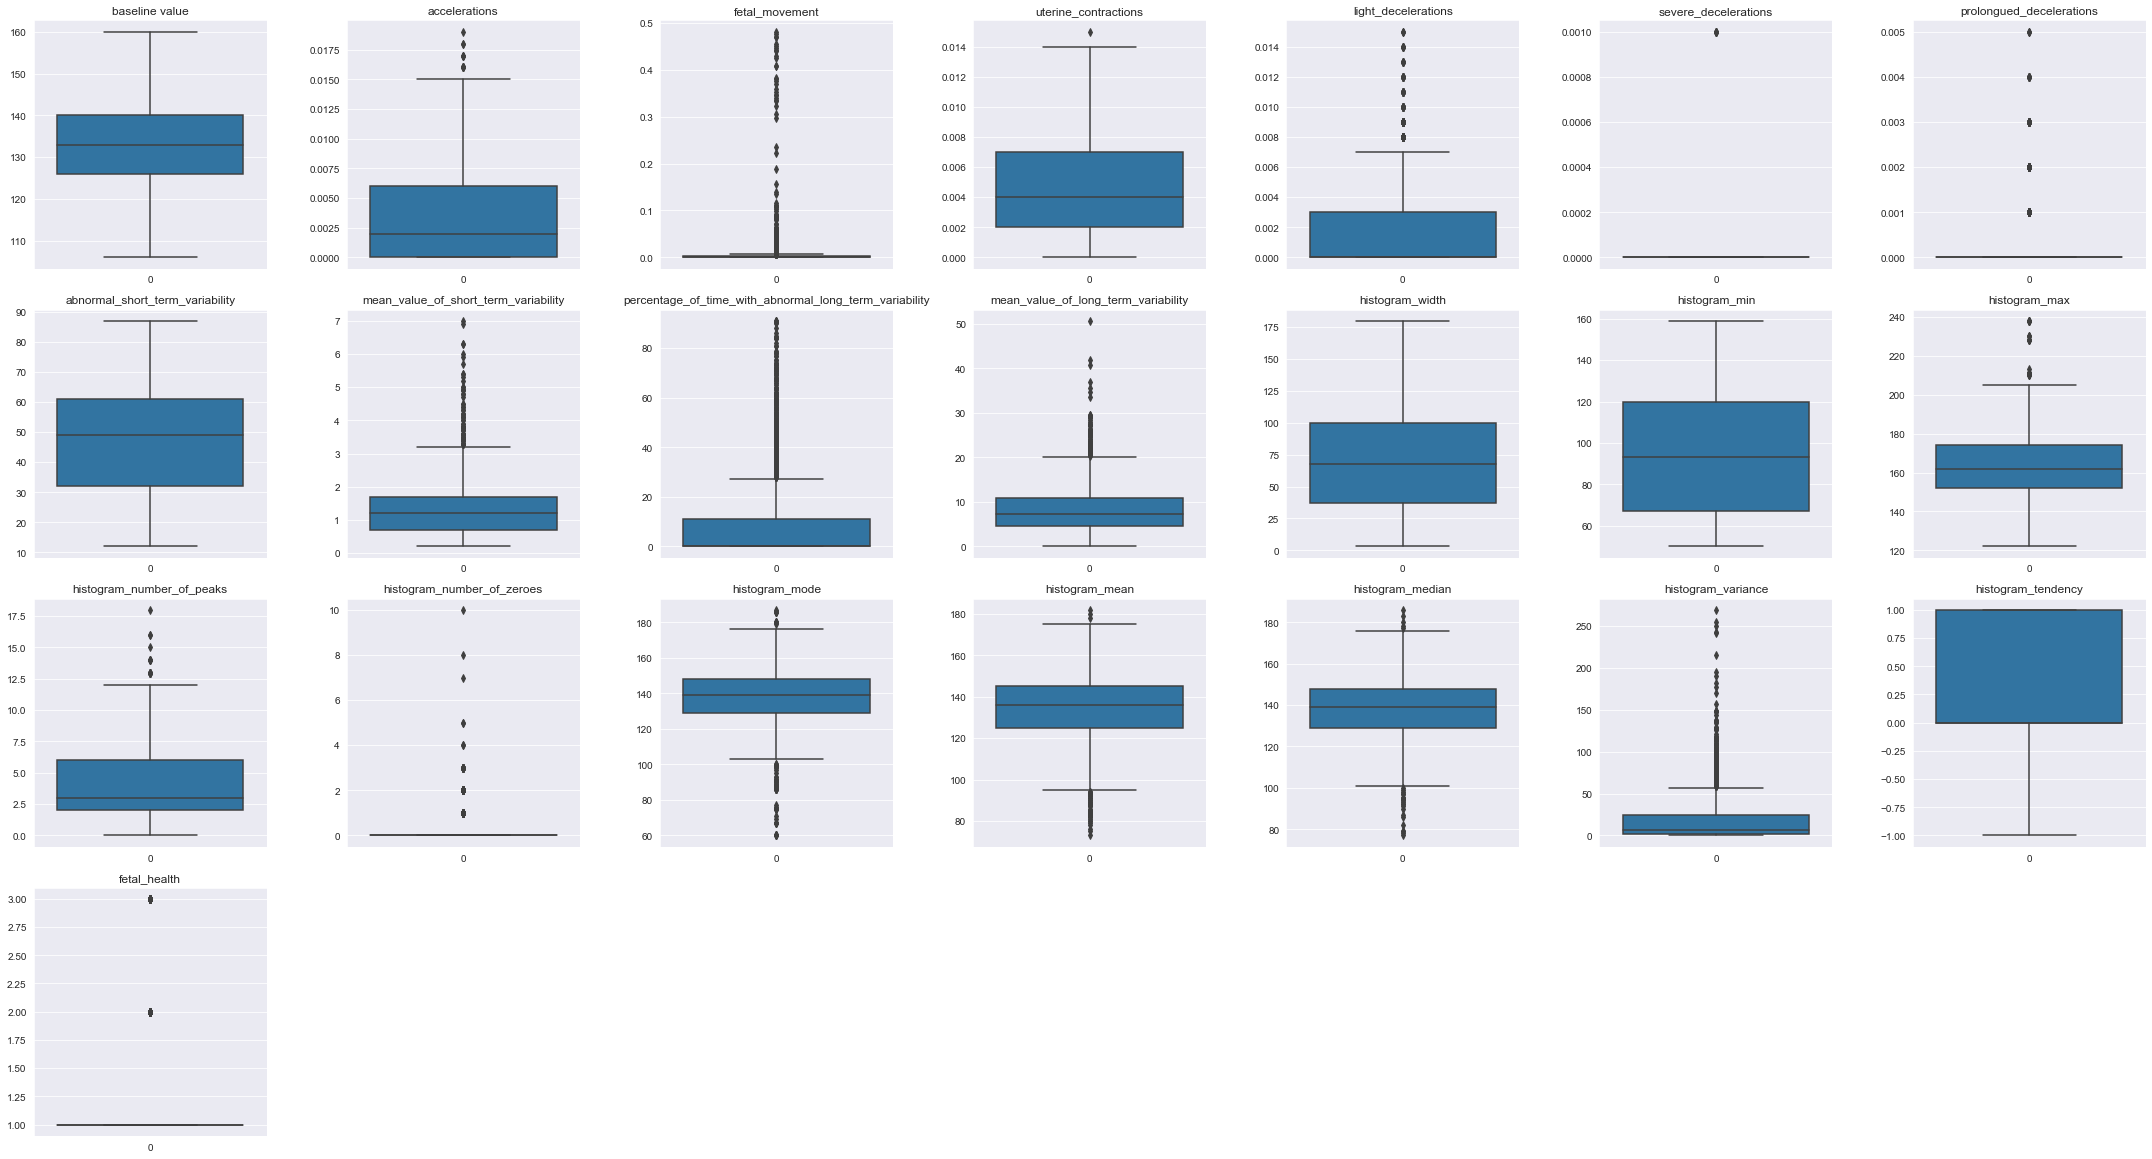

In [50]:
plt.figure(figsize=(30, 20))

for i, column in enumerate(dat_c.columns):
    plt.subplot(5, 7, i + 1)
    
    sns.boxplot(data = dat_c[column])
    plt.title(column)

    
plt.tight_layout()
plt.show()

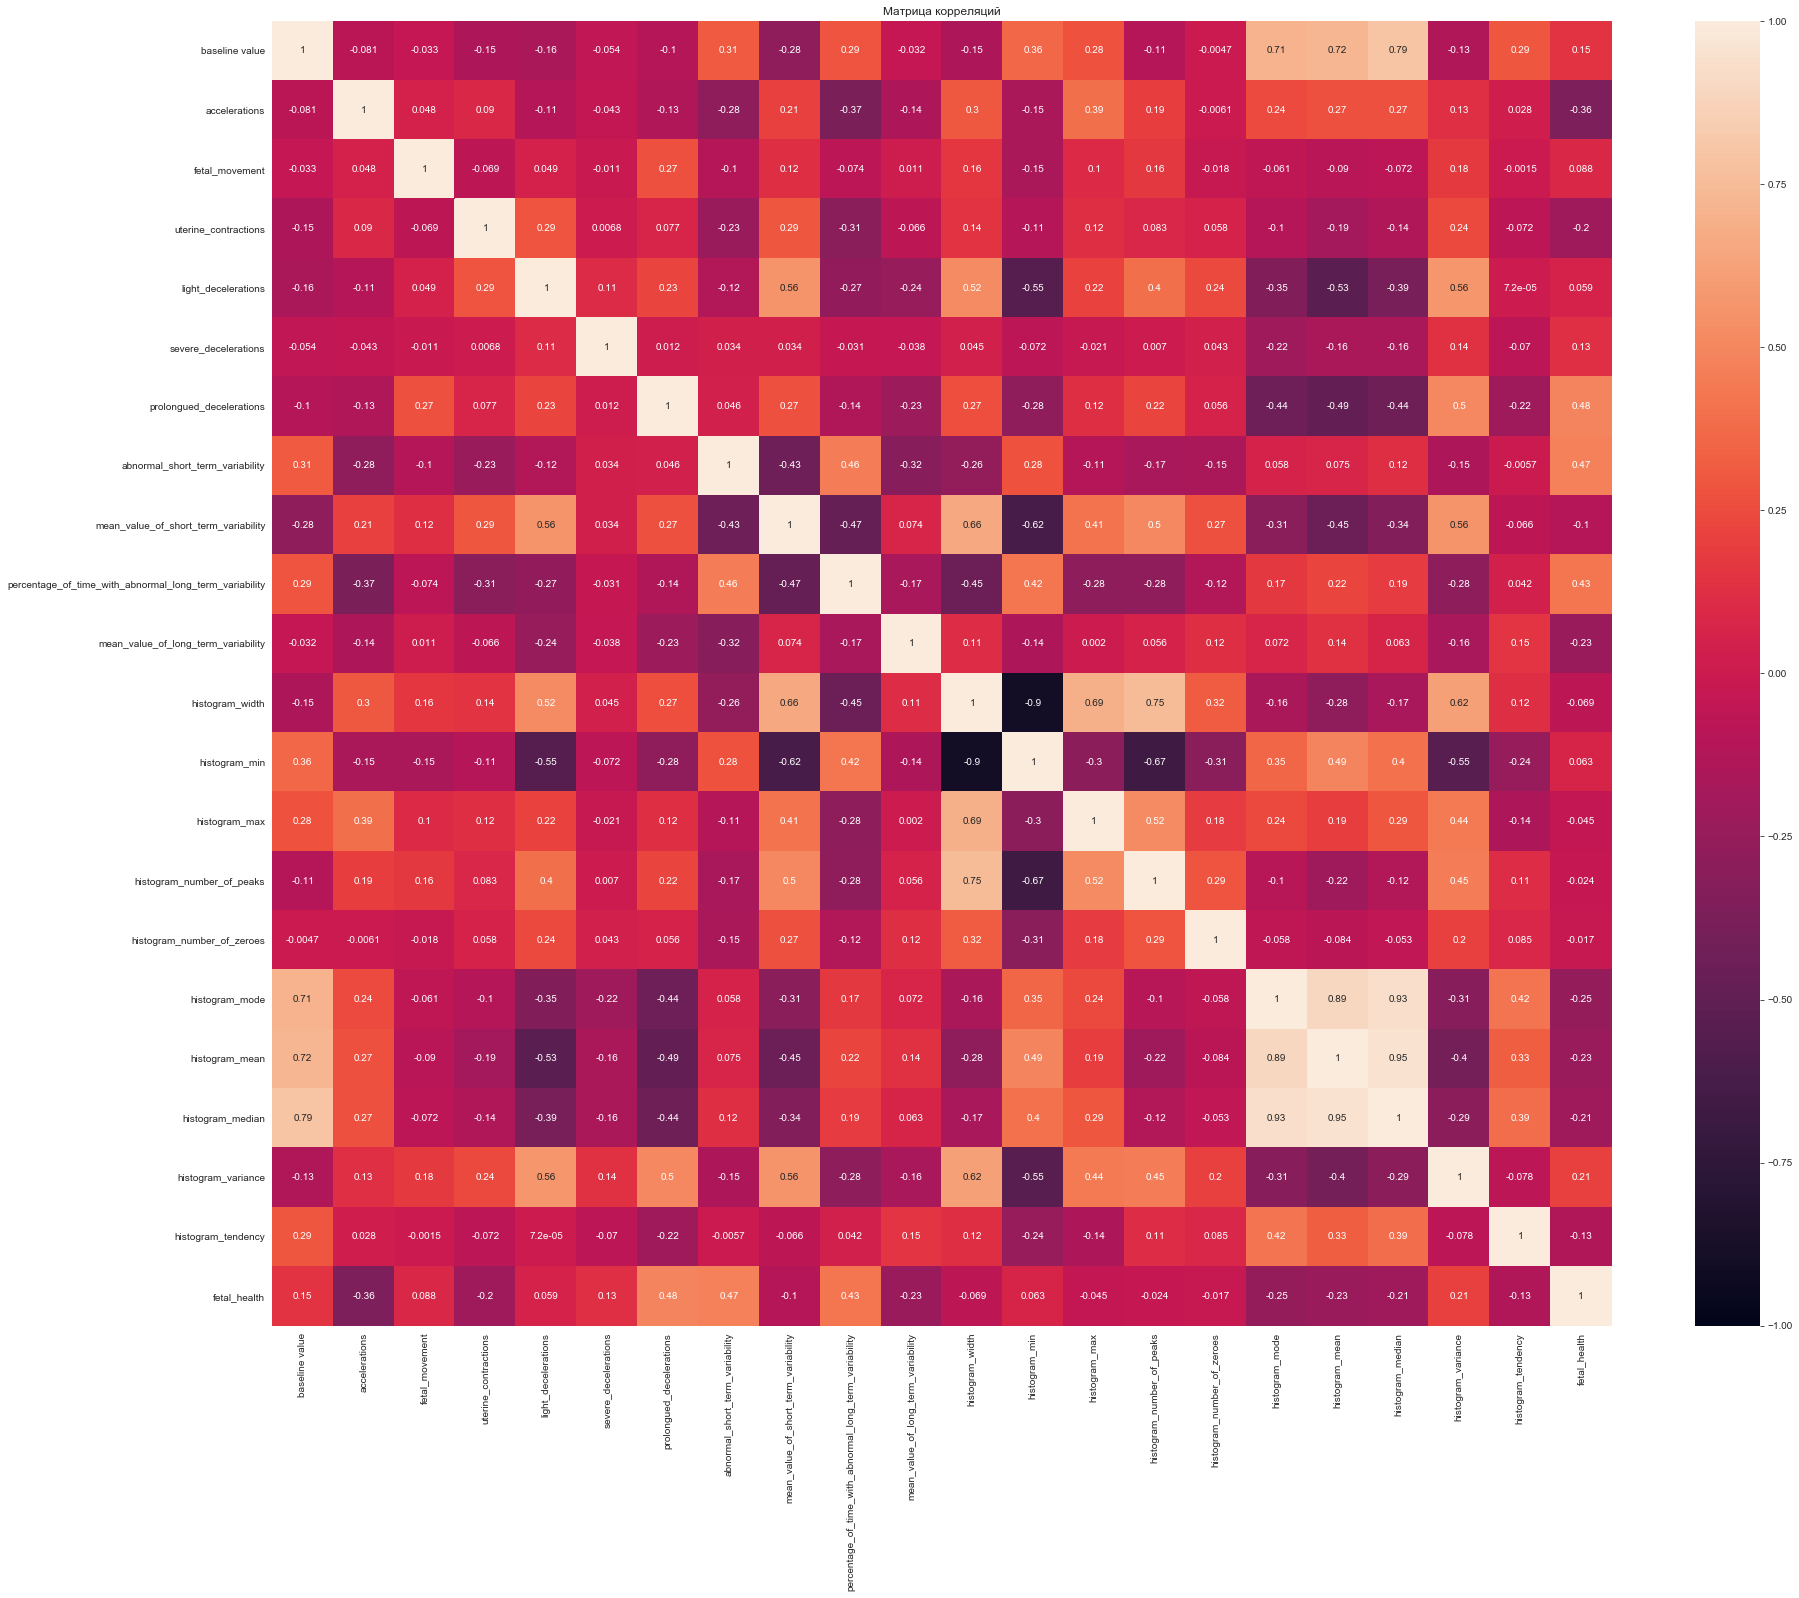

In [52]:
plt.figure(figsize=(30, 24))

sns.heatmap(dat_c.corr(), annot=True, vmin=-1.0)
plt.title("Матрица корреляций")
plt.show()

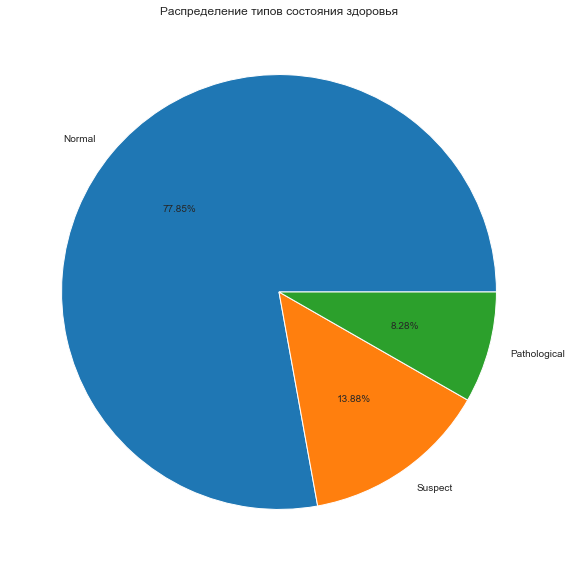

In [53]:
plt.figure(figsize=(10, 10))

plt.pie(
    dat_c['fetal_health'].value_counts(),
    autopct='%1.2f%%',
    labels=["Normal", "Suspect", "Pathological"]
)
plt.title("Распределение типов состояния здоровья")
plt.show()

### Предобработка данных:


In [34]:
def preprocessing_data(data):
    data = data.copy()
    
    # Изменим целевую переменную
    data['fetal_health'] = data['fetal_health'].replace(
        {
        1.0: "Normal",
        2.0: "Suspect",
        3.0: "Pathological"
    }
    )
    
    # Разделим признаки и целевую переменную
    y = data['fetal_health']
    X = data.drop('fetal_health', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Стандартизируем X
    scal = StandardScaler()
    scal.fit(X_train)
    X_train = pd.DataFrame(scal.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scal.transform(X_test), columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = preprocessing_data(data)

In [36]:
X_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.754973,0.731770,-0.204095,0.551513,-0.651135,-0.051917,-0.277438,-1.269308,0.073240,-0.537234,-0.324758,-0.595014,0.477137,-0.506937,-0.716047,-0.454252,-0.263063,0.035465,-0.208156,-0.340585,-0.525276
1,1.740547,-0.822284,-0.204095,-1.477290,-0.316227,-0.051917,-0.277438,1.688720,-1.297591,1.827866,-0.522608,-0.931081,1.023066,-0.338574,-1.061197,-0.454252,1.019938,1.198135,1.178619,-0.618965,1.096324
2,1.324627,-0.822284,-0.204095,0.551513,-0.651135,-0.051917,-0.277438,1.050714,-1.069119,1.277843,-0.126908,-1.060338,1.398392,-0.001848,-1.061197,-0.454252,0.775557,0.939764,0.901264,-0.618965,-0.525276
3,-0.547013,-0.822284,7.146148,-0.462889,0.353589,-0.051917,4.696388,-0.747303,1.329835,-0.537234,-0.738444,1.912562,-1.331252,1.962388,2.390302,0.936543,-3.806591,-2.289874,-2.496335,4.496267,-2.146877
4,-1.378853,-0.822284,-0.028041,-1.477290,-0.651135,-0.051917,-0.277438,0.238707,-0.726411,0.287801,-0.126908,-1.293000,0.545379,-1.909963,-1.061197,0.936543,-0.874016,-0.868833,-1.040221,-0.653763,-0.525276


In [37]:
y_train.head()

1178          Normal
408          Suspect
802          Suspect
22      Pathological
204           Normal
Name: fetal_health, dtype: object

In [38]:
Models = {
    "                                    NN": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0),
    "                   Logistic Regression": LogisticRegression(),
    "                                   KNN": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                   SVM (Linear Kernel)": LinearSVC(),
    "                      SVM (RBF Kernel)": SVC()
}

In [40]:
for n, m in Models.items():
    m.fit(X_train, y_train)
    print(n + " trained")

                                    NN trained
                         Random Forest trained
                     Gradient Boosting trained
                               XGBoost trained
                              LightGBM trained
                              CatBoost trained
                   Logistic Regression trained
                                   KNN trained
                         Decision Tree trained
                   SVM (Linear Kernel) trained
                      SVM (RBF Kernel) trained


In [42]:
for n, m in Models.items():
    print(n + ": {:1.2f}%".format(m.score(X_test, y_test) * 100))

                                    NN: 91.54%
                         Random Forest: 93.42%
                     Gradient Boosting: 94.98%
                               XGBoost: 94.98%
                              LightGBM: 94.67%
                              CatBoost: 94.20%
                   Logistic Regression: 90.13%
                                   KNN: 89.97%
                         Decision Tree: 91.22%
                   SVM (Linear Kernel): 89.03%
                      SVM (RBF Kernel): 91.07%


Видно, что после предобработки данных наулучший результат у Gradient Boosting и XGBoost

Теперь попробуем улучшить результат, отобрав более важные признаки для целевой переменной из общего списка

In [57]:
corr[abs(corr['fetal_health']) > 0.1]['fetal_health']

baseline value                                            0.148151
accelerations                                            -0.364066
uterine_contractions                                     -0.204894
severe_decelerations                                      0.131934
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
mean_value_of_short_term_variability                     -0.103382
percentage_of_time_with_abnormal_long_term_variability    0.426146
mean_value_of_long_term_variability                      -0.226797
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
histogram_median                                         -0.205033
histogram_variance                                        0.206630
histogram_tendency                                       -0.131976
fetal_health                                              1.00

In [62]:
data_new = data[corr[abs(corr['fetal_health']) > 0.1]['fetal_health'].index]

In [63]:
X_new_train, X_new_test, y_new_train, y_new_test = preprocessing_data(data_new)

In [69]:
gbc = GradientBoostingClassifier()
gbc.fit(X_new_train,y_new_train)
print("Gradient Boosting" + ": {:1.2f}%".format(gbc.score(X_new_test, y_new_test) * 100))

Gradient Boosting: 95.45%


Откинув признаки, которые слабо коррелируют с целевой переменной, мы улучшили качество модели Gradient Boosting на 0.47%